# Chapter  2: Optimizing a Network with Backpropagation

## Lesson 1: Adjusting Weights Manually to Get a Better Prediction

In [384]:
# adjust the weights until you find the perfect output for is set of inputs
# from sklearn.metrics import mean_squared_error
# now use the from MSE to calculate errors for a series of sets of inputs, each set conaining the data to make a single prediction

In [385]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Lesson 2: Algorithm to Automatically Adjust Weights (Gradient Decent)

### Gradient Decent for a Single Node

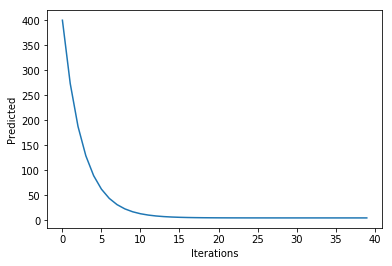

In [386]:
# (From the slides on adjusting one node in a zero hidden layer network)
# Play around with input, starting weight and predicted to see how the computer is adjusting the weight
input = 4
w = 100
predicted = input * w
expected = 5
output = [predicted]
for _ in range (39):
    w -= 2 * (predicted - expected) * input * .01
    predicted = input * w
    output.append(predicted)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(40), output)
ax.set_xlabel('Iterations')
ax.set_ylabel('Predicted')

plt.show()

### Calculating Gradient for Multiple Weights

In [387]:
# Setup the weights, input_data and target
weights = np.array([5, 7])
sleep = 8
study = 5
input_data = np.array([sleep, study])
target = 80

In [388]:
# Calculate the prediction: prediction
prediction = (weights * input_data).sum()

# Calculate the error: error
error = prediction - target

# Calculate the gradient: gradient
# Notice derivative of activation function "missing"... because no activation function on input nodes
gradient = 2 * input_data * error

# Print the gradient
print("Guessed {} but actual value was {}. Calculated a gradient for the weights as {} respectively.".format(prediction, target, gradient))
print("Recall that to update the weights, its weight = weight - gradient * learning_rate.")

Guessed 75 but actual value was 80. Calculated a gradient for the weights as [-80 -50] respectively.
Recall that to update the weights, its weight = weight - gradient * learning_rate.


### Performing Gradient Decent on Multiple Weights

In [389]:
# Set the learning rate constant: LEARNING_RATE
LEARNING_RATE = 0.01

# Calculate the prediction: prediction
prediction = (weights * input_data).sum()

# Calculate the error: error
error = prediction - target

# Calculate the gradient: gradient
gradient = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights -  gradient * LEARNING_RATE

# Get updated prediction: pred_updated
pred_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = pred_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

-5
3.9


### Performing Gradient Decent on Multiple Layers: Backpragation
write it later

## Lesson 3: Using Keras

In [397]:
%run data_wrangling_titantic.ipynb

Targets
 [[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]
Targets and predictors from titantic data set loaded successfully.


## Build Your First Classifier Model Using Keras!

In [391]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add a hidden layer
model.add(Dense(n_cols, activation='relu', input_shape=(n_cols,)))

# Add another hidden layer
model.add(Dense(n_cols, activation='sigmoid', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

In [395]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: categorical_crossentropy


In [396]:
# Fit the model
model.fit(predictors, targets)

Epoch 1/10
891/891 [==============================] - 0s - loss: 0.6081 - acc: 0.6857     
Epoch 2/10
891/891 [==============================] - 0s - loss: 0.6015 - acc: 0.7015     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.5965 - acc: 0.6992     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.5904 - acc: 0.7104     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.5843 - acc: 0.7093     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.5792 - acc: 0.7116     
Epoch 7/10
891/891 [==============================] - 0s - loss: 0.5734 - acc: 0.7093     
Epoch 8/10
891/891 [==============================] - 0s - loss: 0.5692 - acc: 0.7149     
Epoch 9/10
891/891 [==============================] - 0s - loss: 0.5633 - acc: 0.7183     
Epoch 10/10
891/891 [==============================] - 0s - loss: 0.5564 - acc: 0.7194     


In [394]:
# raw_data.columns
# Predicting with the Model
# Make a fake person (out-of-data sample)
new_data = {'Pclass' : [3], 'Sex' : [0], 'Age' : [5], 'SibSp' : [4], 'Parch' : [2], 'Fare' : [0],
       'Embarked' : [3]}
df = pd.DataFrame(data=new_data)
pred_data = df.as_matrix()

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

ValueError: Error when checking : expected dense_67_input to have shape (None, 12) but got array with shape (1, 7)